In [1]:
import sys

sys.path.append("..")  # to make utils importable

In [2]:
import utils.data_worker
import utils.consts

In [3]:
dataset = utils.data_worker.load_dataset(utils.consts.POSTS_DATA_PATH)
dataset.sample(5)

Data loaded


,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,Tags,AnswerCount,CommentCount,ClosedDate,CommunityOwnedDate,ContentLicense,ParentId,OwnerDisplayName,LastEditorDisplayName,FavoriteCount
9459,23387,2,NaN,2010-12-03T12:56:43.787,8,NaN,<p>There are some language features in C# (4/5...,611.0,NaN,None,...,None,NaN,3,None,None,CC BY-SA 2.5,23364.0,None,None,NaN
2872,8632,2,NaN,2010-09-30T20:01:54.470,2,NaN,"<p>If you are given a task, and eithe the only...",855.0,NaN,None,...,None,NaN,1,None,None,CC BY-SA 2.5,1750.0,None,None,NaN
1715,5228,2,NaN,2010-09-19T02:03:34.420,45,NaN,<p>You always keep ownership under open-source...,935.0,935.0,2011-12-23T13:43:33.800,...,None,NaN,1,None,None,CC BY-SA 3.0,5225.0,None,None,NaN
3596,10542,2,NaN,2010-10-08T16:23:34.573,6,NaN,<p>I would say the multi-threading and it's im...,NaN,NaN,None,...,None,NaN,1,None,None,CC BY-SA 2.5,10512.0,user2567,None,NaN
3034,9125,2,NaN,2010-10-03T10:10:39.820,2,NaN,<p>I assume you refer to the out-of-the-box Ec...,782.0,NaN,None,...,None,NaN,6,None,None,CC BY-SA 2.5,9122.0,None,None,NaN


In [4]:
dataset.count()

Id                       10000
PostTypeId               10000
AcceptedAnswerId           896
CreationDate             10000
Score                    10000
ViewCount                 1278
Body                     10000
OwnerUserId               9322
LastEditorUserId          2727
LastEditDate              2949
LastActivityDate         10000
Title                     1278
Tags                      1278
AnswerCount               1278
CommentCount             10000
ClosedDate                 717
CommunityOwnedDate        2847
ContentLicense           10000
ParentId                  8715
OwnerDisplayName           673
LastEditorDisplayName      261
FavoriteCount               61
dtype: int64

In [5]:
dataset.PostTypeId.value_counts()

PostTypeId
2    8715
1    1278
5       3
4       3
7       1
Name: count, dtype: int64

In [ ]:
questions, answers = utils.data_worker.question_answer_split(dataset)

In [6]:
questions.Body.sample().iloc[0]

"<p>We are building a web service(SOAP, .Net) which would be talking to (mostly) native clients (windows, C++) and we are wondering what is the best way to communicate errors to the client (e.g. SomethingBadHappened like login service not available or something like user not found) and haven't been able to decide between throwing exception to the client or using some kind of error code model to do the above.</p>\n\n<p>What you would prefer on the handling on the client side: receiving a error code or handling a ServerFault exception which contains the reason for the error?<br>\n1) Why are we thinking exception: Because it would make server side code a lot more uniform<br>\n2) Why are we thinking error codes: Because we <em>think</em> it makes more sense from the client side perspective.  </p>\n\n<p>If 2) is really true we would probably want to go for error codes than exceptions? Is that the case here?</p>\n\n<p>Also, would the answer change if we were talking to managed clients instea

In [7]:
answers.Body.sample().iloc[0]

'<p>I\'m just shy of your threshold, but several of my colleagues above your threshold hated management duties.  Some did the management thing for a while, and then went back to coding.  Management is a completely different skill set, and what makes a good programmer makes a bad manager (and vice versa).</p>\n\n<p>Honestly, the pull for management is due to the way most companies are structured.  Once you hit the ceiling as a coder, there is no further up you can go--which is also reflected in your paycheck vs. your manager\'s paycheck.  I have yet to see a company actually try what was written in "The Mythical Man Month".</p>\n'

In [8]:
def info(feature, upper_bound, bins):
    print("max:", feature.max(), "min:", feature.min(), "mean:", feature.mean(), "std:", feature.std())
    feature[feature <= upper_bound].hist(bins=bins)

<Axes: >

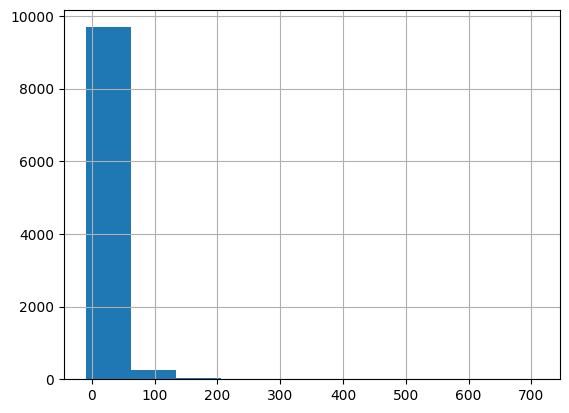

In [9]:
dataset.Score.hist()

max: 709 min: -9 mean: 11.8766 std: 25.589186252894184


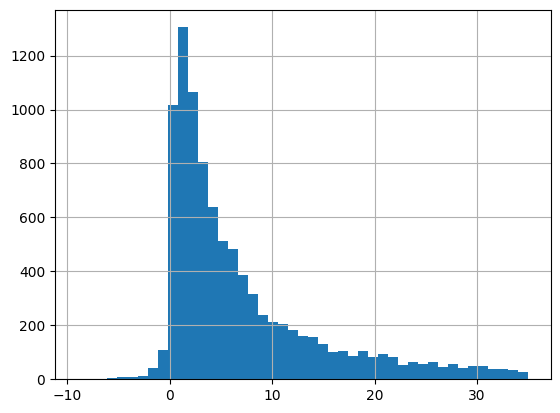

In [10]:
info(dataset.Score, 35, 45)

<Axes: >

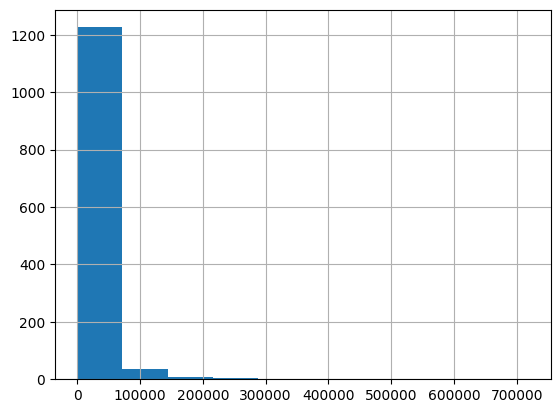

In [11]:
dataset.ViewCount.hist()

max: 718468.0 min: 66.0 mean: 13195.057902973396 std: 38354.46693234853


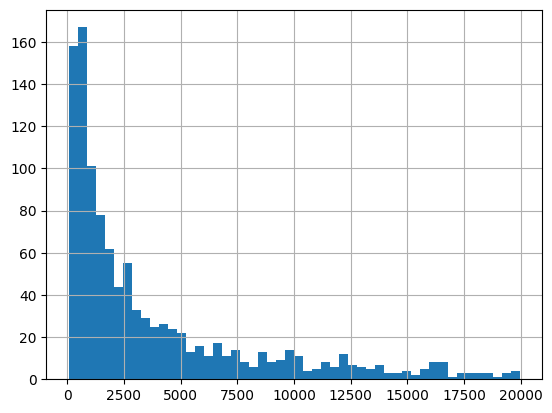

In [12]:
info(dataset.ViewCount, 20000, 50)

<Axes: >

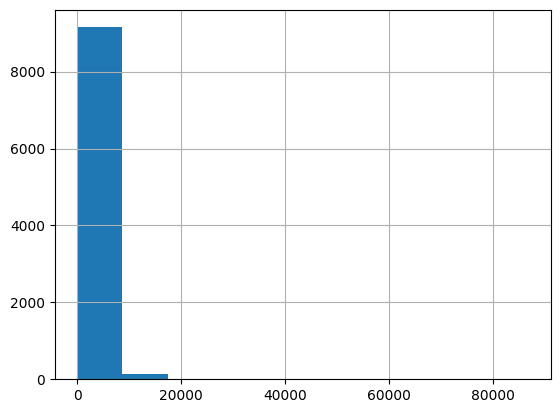

In [13]:
dataset.OwnerUserId.hist()

In [14]:
len(dataset.OwnerUserId.unique()), dataset.OwnerUserId.count()

(2018, 9322)

max: 86854.0 min: -1.0 mean: 3043.171315168419 std: 3229.3470785832974


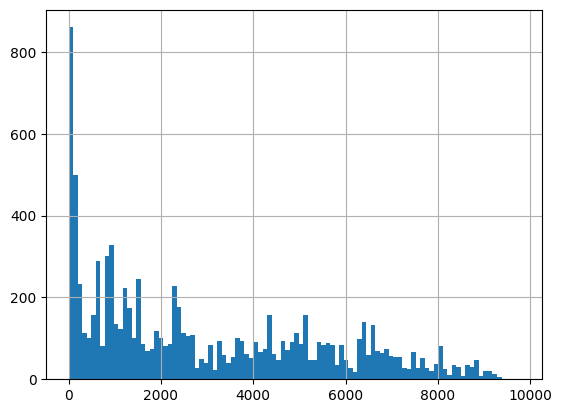

In [15]:
info(dataset.OwnerUserId, 10000, 100)

<Axes: >

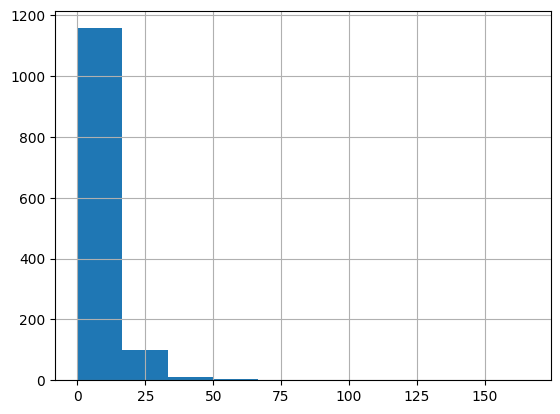

In [16]:
dataset.AnswerCount.hist()

max: 166.0 min: 0.0 mean: 8.376369327073553 std: 9.521108163890506


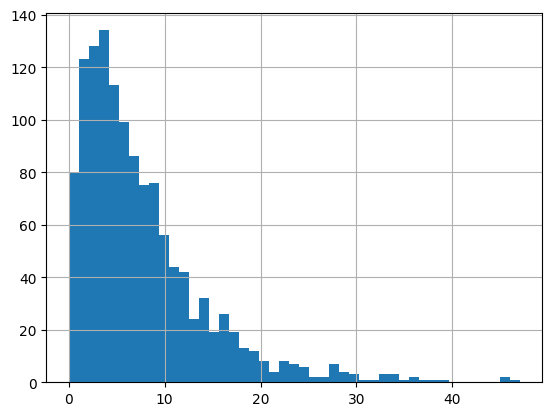

In [17]:
info(dataset.AnswerCount, 50, 45)

<Axes: >

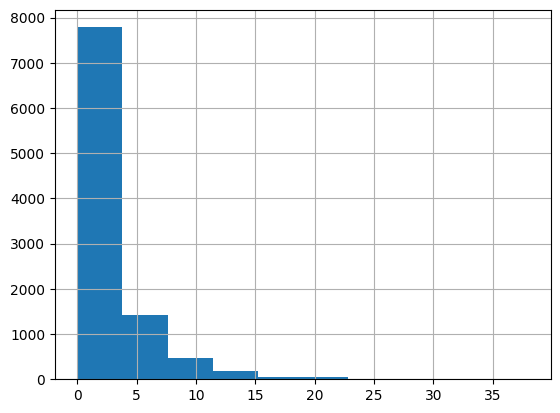

In [18]:
dataset.CommentCount.hist()

max: 38 min: 0 mean: 2.3056 std: 3.6471274715698363


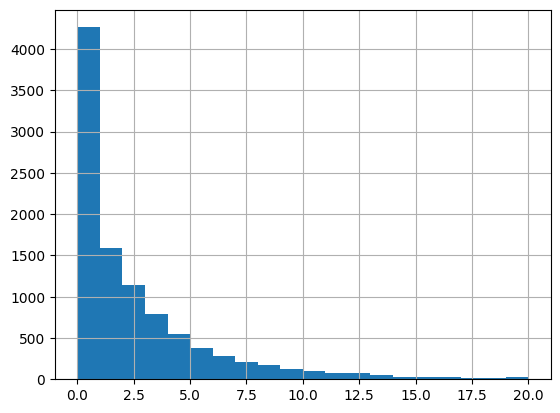

In [19]:
info(dataset.CommentCount, 20, 20)

<Axes: >

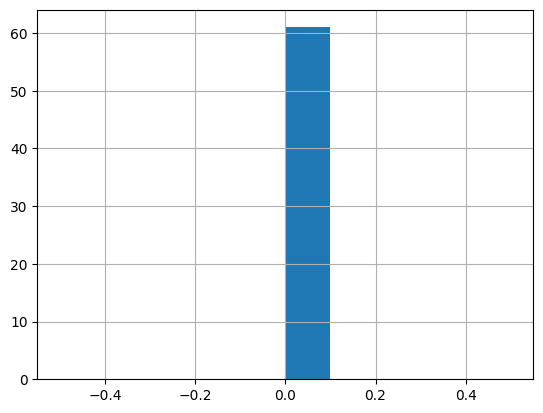

In [20]:
dataset.FavoriteCount.hist()

In [21]:
dataset.Tags.dropna().sample(5)

7088                                    |books|lean|
6469                            |agile|scrum|sprint|
9744    |productivity|time-management|time-tracking|
268                              |team|organization|
7856                                        |design|
Name: Tags, dtype: object

In [22]:
dataset.PostTypeId.value_counts()

PostTypeId
2    8715
1    1278
5       3
4       3
7       1
Name: count, dtype: int64

In [23]:
dataset["Body"] = dataset["Body"].apply(utils.data_worker.html_to_str)
dataset = dataset[utils.consts.POST_ESSENTIAL_COLUMNS]

In [24]:
dataset.PostTypeId.value_counts()

PostTypeId
2    8715
1    1278
5       3
4       3
7       1
Name: count, dtype: int64

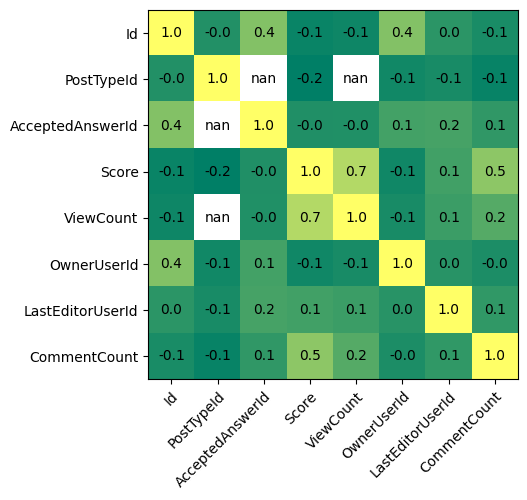

In [25]:
import matplotlib.pyplot
import numpy


numerical = dataset.drop(columns=["CreationDate", "Body", "Tags", "ClosedDate", "FavoriteCount"])
corr = numerical.corr()
figure, axes = matplotlib.pyplot.subplots()
axes.imshow(corr, cmap="summer")

axes.set_xticks(numpy.arange(len(numerical.columns)), labels=numerical.columns)
axes.set_yticks(numpy.arange(len(numerical.columns)), labels=numerical.columns)

matplotlib.pyplot.setp(axes.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(numerical.columns)):
    for j in range(len(numerical.columns)):
        axes.text(j, i, round(corr.iloc[i, j], 1), ha="center", va="center", color="black")

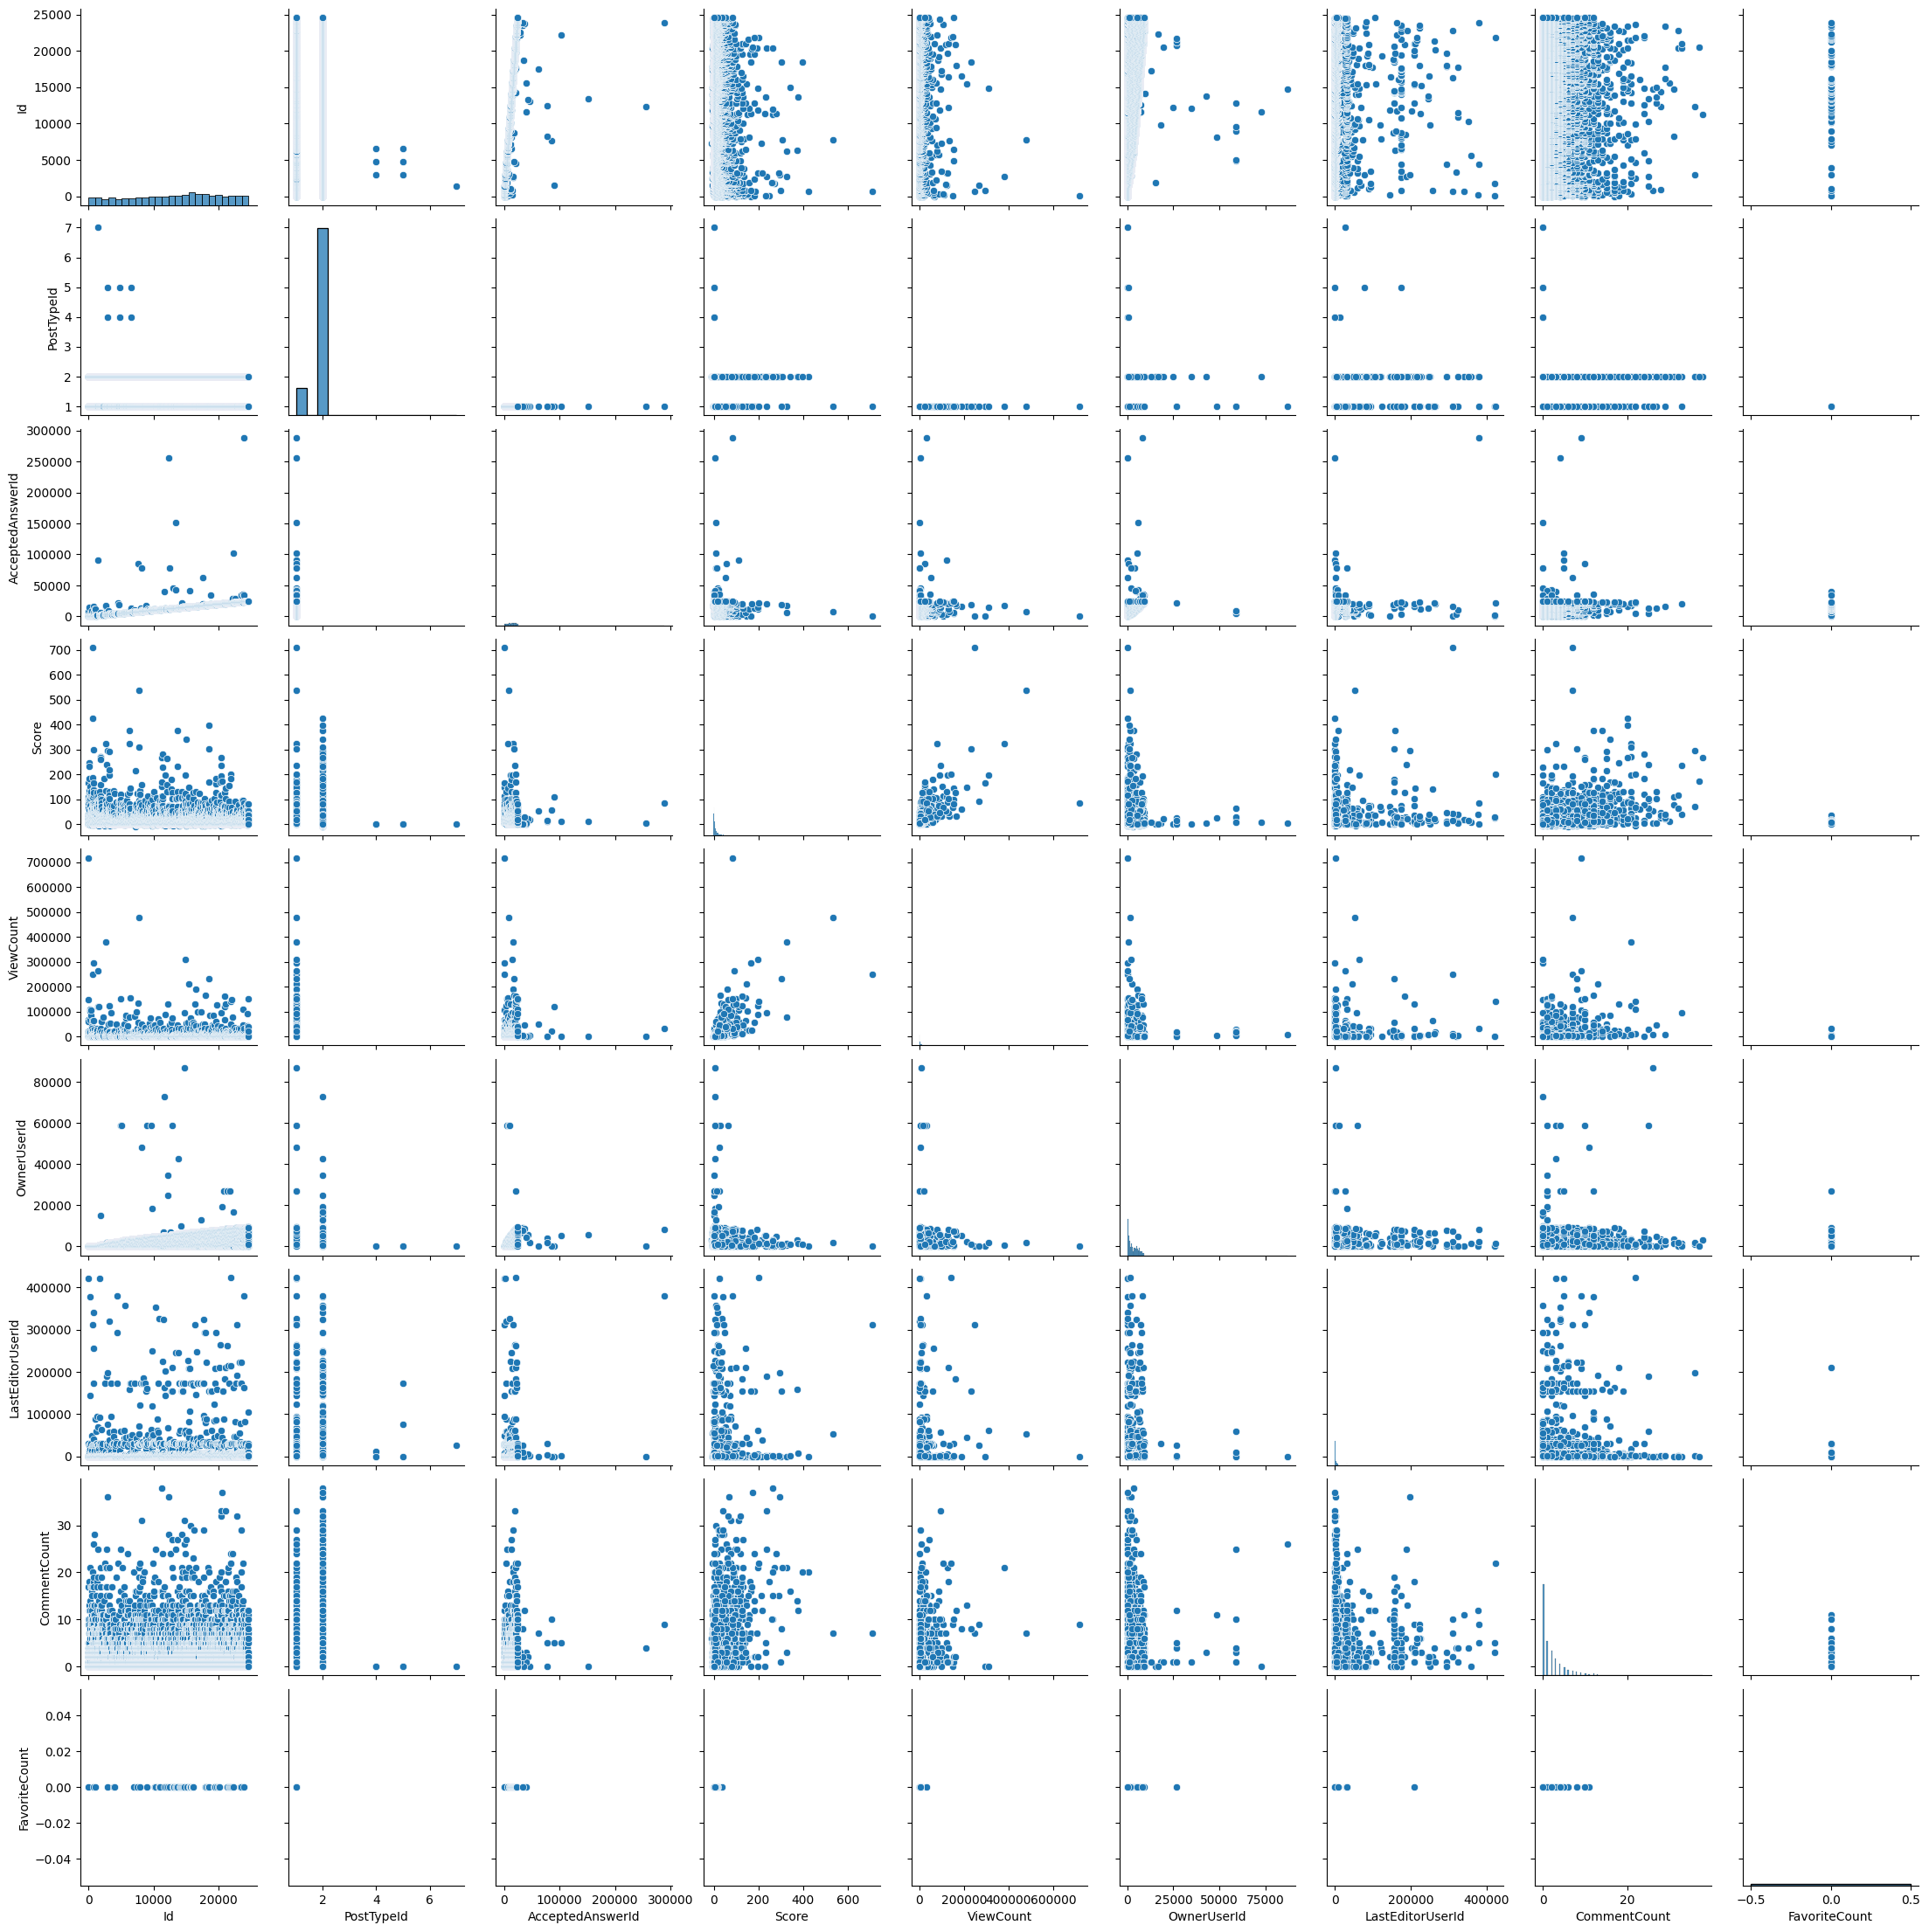

In [26]:
import seaborn


seaborn.pairplot(dataset)

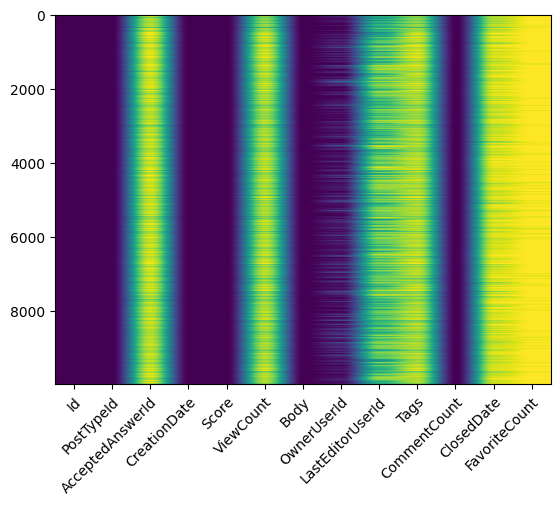

In [27]:
figure, axes = matplotlib.pyplot.subplots()
axes.imshow(dataset.isnull(), aspect='auto', cmap='viridis')
axes.set_xticks(numpy.arange(len(dataset.columns)), labels=dataset.columns)
matplotlib.pyplot.setp(axes.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
matplotlib.pyplot.show()

In [28]:
questions, answers = utils.data_worker.question_answer_split(dataset)

utils.consts.POST_ESSENTIAL_COLUMNS

['Id',
 'PostTypeId',
 'AcceptedAnswerId',
 'CreationDate',
 'Score',
 'ViewCount',
 'Body',
 'OwnerUserId',
 'LastEditorUserId',
 'Tags',
 'CommentCount',
 'ClosedDate',
 'FavoriteCount']